In [1]:
#Import Necessary libraries
import pandas as pd
import numpy as np
% matplotlib inline
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('1.txt')
print(f"Number of observation: {df.shape}")
df.head()

Number of observation: (97, 2)


,population of a city,profit of a food truck
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
X = np.array(df['population of a city'])
y = np.array(df['profit of a food truck'])

In [54]:
def mse_calc(X,y,intercept,slope):
    pred = []
    tot_error = 0
    for i in range(len(X)):
        # prediction y_pred = b0 + b1 * x
        pred.append(intercept + (slope * X[i]))
        # mean squared error (y - y_pred)**2 / len(X)
        tot_error += (y[i] - ((slope*X[i]) + intercept)) ** 2
        
    return tot_error/len(X),pred

In [55]:
def gradient_descent(iterations,l_rate,X,y,s_slope,s_intercept):
    for i in range(iterations):
    #perform gradient descent for given number of iterations
        int_intercept = 0
        int_slope = 0
        n_pt = len(X)
        
        for i in range(len(X)):
            #update derivative of intercept
            int_intercept += - (2/n_pt) * (y[i] - ((s_slope * X[i]) + s_intercept))
            #update derivative of slope
            int_slope += - (2/n_pt) * X[i] * (y[i] - ((s_slope * X[i]) + s_intercept))
        #update intercept and slope
        final_slope = s_slope - (l_rate * int_slope)
        final_intercept = s_intercept - (l_rate * int_intercept)
        s_slope = final_slope
        s_intercept = final_intercept
    return s_slope,s_intercept
            

In [61]:
iter_val = 1000
start_slope = 0
start_intercept = 0
learning_rate = 0.0001
grad_slope,grad_intercept = gradient_descent(iter_val,learning_rate,X,y,start_slope,start_intercept)
final_e_val,prediction = mse_calc(X,y,grad_intercept,grad_slope)
print("Gradient Slope:", grad_slope)
print("Gradient Intercept:",grad_intercept)
print("Error:",final_e_val)

Gradient Slope: 0.8077926520338518
Gradient Intercept: -0.06104372530053788
Error: 11.631450024036447


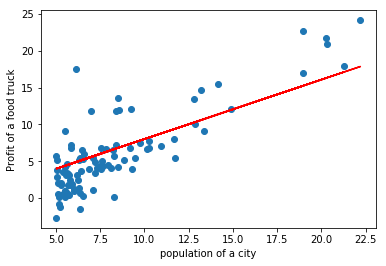

In [62]:
plt.scatter(X,y);
plt.plot(X,prediction,c= 'r');
plt.xlabel('population of a city');
plt.ylabel('Profit of a food truck');